In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# 컬럼 제거 전

## 파일 적제

In [222]:
SC_train  = pd.read_csv('/content/drive/MyDrive/iTStudy/Machine Learning/MiniProject/Santander Customer Satisfaction_train.csv')
SC_test   = pd.read_csv('/content/drive/MyDrive/iTStudy/Machine Learning/MiniProject/Santander Customer Satisfaction_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/iTStudy/Machine Learning/MiniProject/sample_submission.csv')


## 데이터 확인

In [3]:
SC_train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


## 정답(TARGET) 분리

In [4]:
SC_train_drop = SC_train.drop(labels=['TARGET'], axis=1)
SC_label = SC_train['TARGET'].copy()

In [ ]:
train_df = SC_train.copy()
test_df = SC_test

## hist를 그려봄

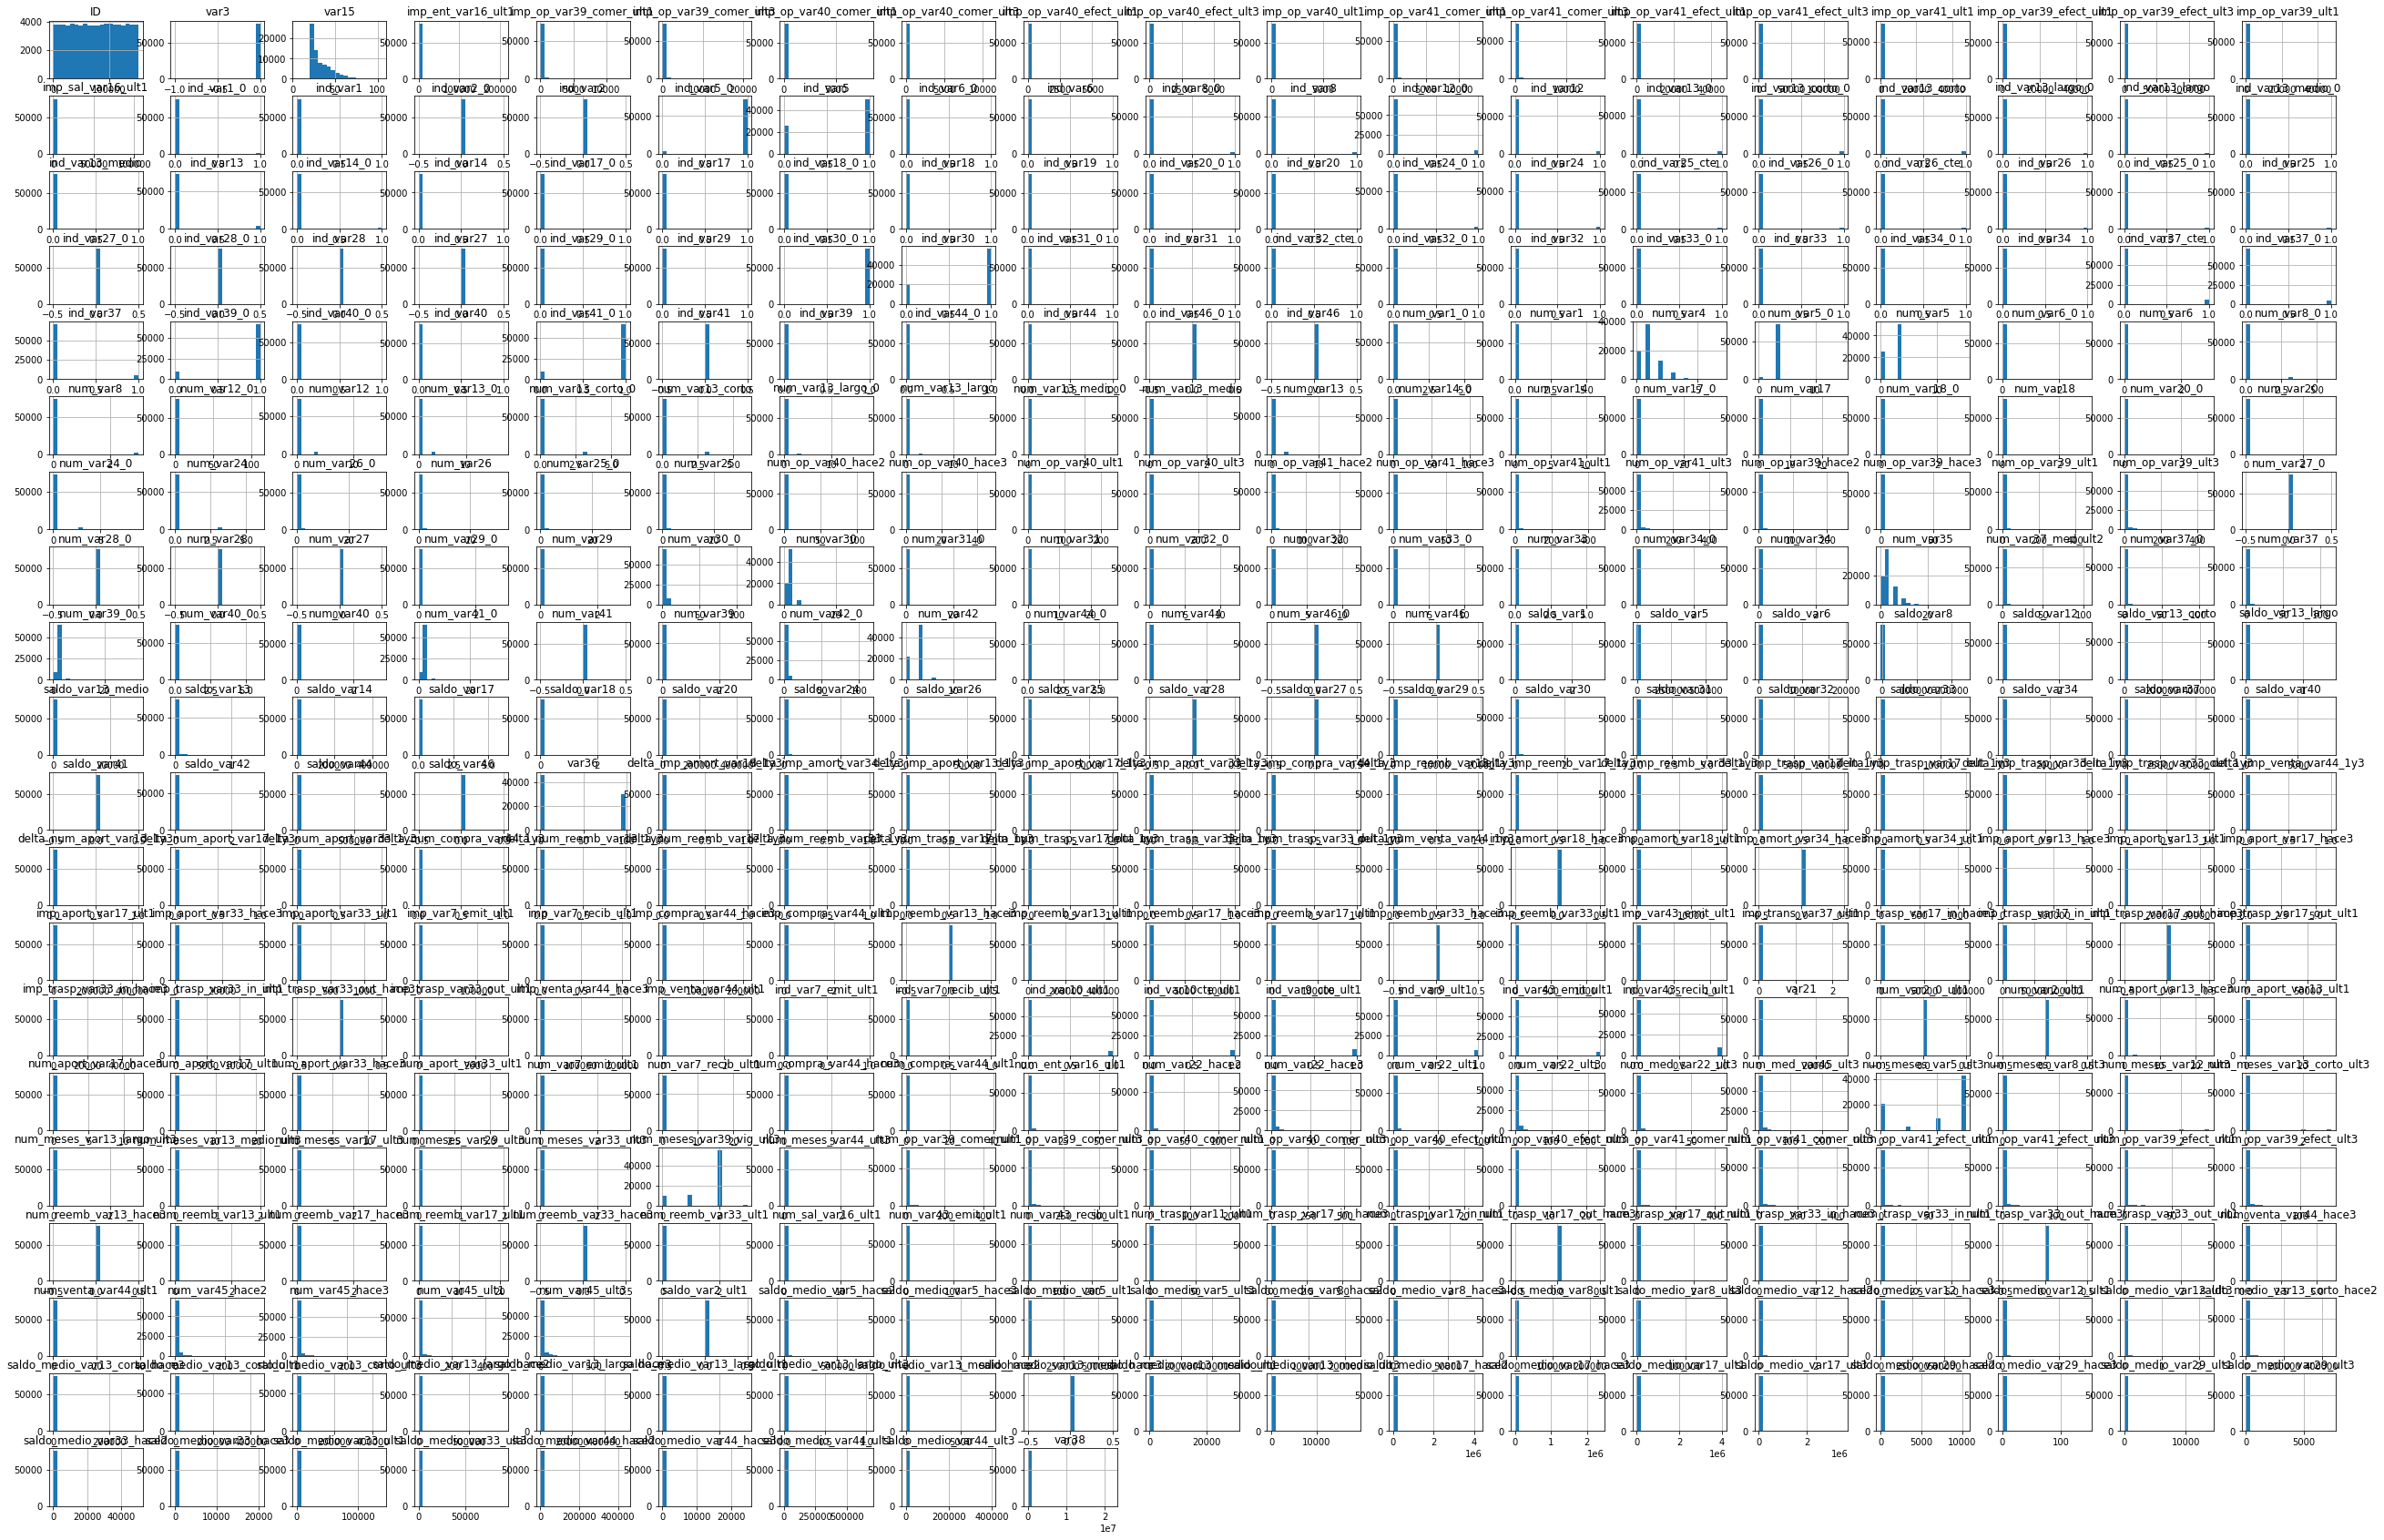

In [5]:
SC_train_drop.hist(bins=20, figsize=(45, 30));

In [ ]:
counts, bins = np.histogram(train_df)

grid=sns.FacetGrid(train_df, hue='TARGET', height=9, aspect=2.5).map(plt.hist, 'var15').add_legend()
grid.set(xticks=train_df.var15)

plt.title('customers')
plt.show()

In [6]:
SC_train_drop.shape # 370개의 컬럼과 1개의 정답(TARGET)

(76020, 370)

In [7]:
SC_train_drop.head() # 역시나 많음.

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [8]:
SC_train_drop.info() # 많아서 생략이 됨. null 확인 불가. 모두 정수와 소수로 되어있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 370 entries, ID to var38
dtypes: float64(111), int64(259)
memory usage: 214.6 MB


In [9]:
SC_train_drop.describe()
# ID는 거의 primary_key 값이랑 같아서 지워도 될듯함.
# var3 에서 -999999 라는 이상치가 발견. - 갯수를 확인해야될듯
# 나머지 값들에서는 대부분 0이지만 표준편차와 평균값이 존재하는것을 보아 수치가 정상적으로 있음 - 하지만 평균 1 이하인 컬럼은 지워줘도 될거 같음.(보류)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,31.879418,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,7331.340000,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07


In [10]:
SC_train_drop.isnull().sum() # null값 존재x

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace2    0
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
Length: 370, dtype: int64

In [11]:
# 이상치 존재 했던 var3 갯수 조회
SC_train_drop.var3.value_counts(), SC_train_drop.var3.max()
# -999999 가 113개 존재함을 확인. 최대치가 238인걸 확인
# 아마 null 값을 -999999로 준거 같음
# 이상적이게 전환해주기. mean or 0 or median

( 2         74165
  8           138
 -999999      116
  9           110
  3           108
            ...  
  231           1
  188           1
  168           1
  135           1
  87            1
 Name: var3, Length: 208, dtype: int64, 238)

## 데이터 전처리

In [12]:
median = SC_train_drop.var3.median()
mean = SC_train_drop.var3.mean()
SC_train_median = SC_train_drop.replace(-999999, median)
SC_train_mean = SC_train_drop.replace(-999999, mean) # 중간값도 '-'가 나와 제외
SC_train_two = SC_train_drop.replace(-999999, 2) # median이 곧 2

In [13]:
median, mean

(2.0, -1523.1992765061825)

In [14]:
# 잘 바뀌었는지 확인
SC_train_median.var3.value_counts()

2      74281
8        138
9        110
3        108
1        105
       ...  
231        1
188        1
168        1
135        1
87         1
Name: var3, Length: 207, dtype: int64

In [15]:
# ID는 단순 식별자이므로 드롭
SC_train_median.drop(['ID'],axis=1,inplace=True)

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm_scaler = MinMaxScaler() # 가우시안 분포로.
s_scaler = StandardScaler() # 스케일 조정
mm_scaler_SC_train = mm_scaler.fit_transform(SC_train_median)
s_scaler_SC_train = s_scaler.fit_transform(SC_train_median)

## 성능 측정 함수

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}\
        F1: {f1:.4f}, AUC: {roc_auc:.4f}')

## 테스트 데이터 셋 분해

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(s_scaler_SC_train, SC_label, random_state=42, test_size=0.2)

In [19]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=18, min_samples_split=20, random_state=42)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
pred_proba = rf_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[14597     0]
 [  607     0]]
정확도: 0.9601, 정밀도: 0.0000, 재현율: 0.0000        F1: 0.0000, AUC: 0.8070


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

lin_mse = mean_squared_error(y_test, pred)
lin_mse

0.03992370428834517

- 문제가 있음.

## standardscaler로 진행시

### XGBClassifier

In [21]:
from xgboost import XGBClassifier


xgb_clf = XGBClassifier(n_estimators=1000, random_state=42,learning_rate=0.02, max_depth=7,
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
            eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

[0]	validation_0-auc:0.817024	validation_1-auc:0.798245
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.828085	validation_1-auc:0.80537
[2]	validation_0-auc:0.833063	validation_1-auc:0.812171
[3]	validation_0-auc:0.836491	validation_1-auc:0.809368
[4]	validation_0-auc:0.837814	validation_1-auc:0.810161
[5]	validation_0-auc:0.841063	validation_1-auc:0.815284
[6]	validation_0-auc:0.842365	validation_1-auc:0.817441
[7]	validation_0-auc:0.844168	validation_1-auc:0.819465
[8]	validation_0-auc:0.844726	validation_1-auc:0.819833
[9]	validation_0-auc:0.84508	validation_1-auc:0.819457
[10]	validation_0-auc:0.845596	validation_1-auc:0.820562
[11]	validation_0-auc:0.845552	validation_1-auc:0.820204
[12]	validation_0-auc:0.845449	validation_1-auc:0.820071
[13]	validation_0-auc:0.845868	validation_1-auc:0.820929
[14]	validation_0-auc:0.846616	validation_1-auc:0.821853

In [22]:
pred = xgb_clf.predict(X_test)
pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba) # 정확도와 재현율이 0이 나옴 왜일까?
# AUC = 0.8471 높은편.

오차행렬
[[14596     1]
 [  606     1]]
정확도: 0.9601, 정밀도: 0.5000, 재현율: 0.0016        F1: 0.0033, AUC: 0.8420


#### 파라미터 수정

In [24]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100, random_state=42)
params2 = {'max_depth':[7], 'min_child_weight': [1], 'colsample_bytree':[0.75],\
           'learning_rate':[0.02], 'reg_alpha':[0.03]}
gridcv_xgb = GridSearchCV(xgb_clf, param_grid=params2, cv=3, n_jobs=-1)
gridcv_xgb.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
               eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-auc:0.817024	validation_1-auc:0.798245
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.828085	validation_1-auc:0.80537
[2]	validation_0-auc:0.833063	validation_1-auc:0.812171
[3]	validation_0-auc:0.836491	validation_1-auc:0.809368
[4]	validation_0-auc:0.837814	validation_1-auc:0.810161
[5]	validation_0-auc:0.841063	validation_1-auc:0.815284
[6]	validation_0-auc:0.842365	validation_1-auc:0.817441
[7]	validation_0-auc:0.844168	validation_1-auc:0.819465
[8]	validation_0-auc:0.844726	validation_1-auc:0.819833
[9]	validation_0-auc:0.84508	validation_1-auc:0.819457
[10]	validation_0-auc:0.845596	validation_1-auc:0.820562
[11]	validation_0-auc:0.845552	validation_1-auc:0.820204
[12]	validation_0-auc:0.845449	validation_1-auc:0.820071
[13]	validation_0-auc:0.845868	validation_1-auc:0.820929
[14]	validation_0-auc:0.846616	validation_1-auc:0.821853


GridSearchCV(cv=3, estimator=XGBClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.75], 'learning_rate': [0.02],
                         'max_depth': [7], 'min_child_weight': [1],
                         'reg_alpha': [0.03]})

In [25]:
print('파라미터: ', gridcv_xgb.best_params_)
xgb_roc_score = roc_auc_score(y_test, gridcv_xgb.predict_proba(X_test)[:, 1], average='macro')
print(f'ROC AUC:{xgb_roc_score:.4f}')

파라미터:  {'colsample_bytree': 0.75, 'learning_rate': 0.02, 'max_depth': 7, 'min_child_weight': 1, 'reg_alpha': 0.03}
ROC AUC:0.8351


In [26]:
xgb_best_model = gridcv_xgb.best_estimator_
pred = xgb_best_model.predict(X_test)
pred_proba = xgb_best_model.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[14597     0]
 [  607     0]]
정확도: 0.9601, 정밀도: 0.0000, 재현율: 0.0000        F1: 0.0000, AUC: 0.8351


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


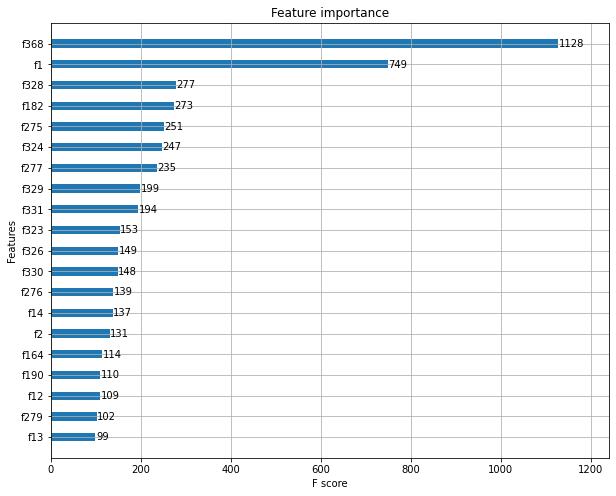

In [27]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

flg, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_best_model, ax=ax, max_num_features=20, height=0.4)

#### 나온 파라미터로 n_estimators 를 증가시켜 시도 했다.

In [28]:
from xgboost import XGBClassifier


xgb_clf = XGBClassifier(n_estimators=500, random_state=42,learning_rate=0.02, max_depth=7,
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03, subsample=0.8)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
            eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

[0]	validation_0-auc:0.818749	validation_1-auc:0.806721
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.818595	validation_1-auc:0.792912
[2]	validation_0-auc:0.828929	validation_1-auc:0.803953
[3]	validation_0-auc:0.833315	validation_1-auc:0.810124
[4]	validation_0-auc:0.836415	validation_1-auc:0.811929
[5]	validation_0-auc:0.837689	validation_1-auc:0.814583
[6]	validation_0-auc:0.839848	validation_1-auc:0.819486
[7]	validation_0-auc:0.841434	validation_1-auc:0.82012
[8]	validation_0-auc:0.842809	validation_1-auc:0.820206
[9]	validation_0-auc:0.842905	validation_1-auc:0.820263
[10]	validation_0-auc:0.844175	validation_1-auc:0.820953
[11]	validation_0-auc:0.845059	validation_1-auc:0.822385
[12]	validation_0-auc:0.84607	validation_1-auc:0.823172
[13]	validation_0-auc:0.84647	validation_1-auc:0.823101
[14]	validation_0-auc:0.846482	validation_1-auc:0.822532


In [29]:
pred_xgb = xgb_clf.predict(X_test)
pred_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred_xgb, pred_proba_xgb)

오차행렬
[[14596     1]
 [  606     1]]
정확도: 0.9601, 정밀도: 0.5000, 재현율: 0.0016        F1: 0.0033, AUC: 0.8431


### LGBMClassifier

In [30]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=1000, random_state=42, learning_rate=0.02, reg_alpha=0.03, 
                              min_child_weight=1, colsample_bytree=0.75)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
                 eval_set=[(X_train, y_train), (X_test, y_test)])
lgbm_roc_score = roc_auc_score(y_test, lgbm_wrapper.predict_proba(X_test)[:, 1], average='macro')
print(f'ROC AUC: {lgbm_roc_score:.4f}')


[1]	training's auc: 0.818522	training's binary_logloss: 0.164419	valid_1's auc: 0.800315	valid_1's binary_logloss: 0.166151
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.820213	training's binary_logloss: 0.163297	valid_1's auc: 0.796034	valid_1's binary_logloss: 0.165313
[3]	training's auc: 0.831032	training's binary_logloss: 0.161664	valid_1's auc: 0.812118	valid_1's binary_logloss: 0.163949
[4]	training's auc: 0.834511	training's binary_logloss: 0.160157	valid_1's auc: 0.81591	valid_1's binary_logloss: 0.162648
[5]	training's auc: 0.836852	training's binary_logloss: 0.158776	valid_1's auc: 0.819671	valid_1's binary_logloss: 0.16147
[6]	training's auc: 0.837703	training's binary_logloss: 0.157919	valid_1's auc: 0.816342	valid_1's binary_logloss: 0.160834
[7]	training's auc: 0.840395	training's binary_logloss: 0.156683	valid_1's auc: 0.819545	valid_1's binary_logloss: 0.159791
[8]	training's auc: 0.840736	training's binary_logloss: 0.155533	valid_

In [31]:
pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[14596     1]
 [  606     1]]
정확도: 0.9601, 정밀도: 0.5000, 재현율: 0.0016        F1: 0.0033, AUC: 0.8438


#### 파라미터 수정

In [32]:
from sklearn.model_selection import GridSearchCV

lgb_clf = LGBMClassifier(n_estimators=100)

params = {'num_leaves':[32], 'max_depth': [128], 'min_child_samples':[100, 120], 'subsample':[0.8],\
          'learning_rate':[0.02, 0.03], 'reg_alpha':[0.03], 'min_child_weight':[1], 'colsample_bytree':[0.5]}
gridcv_lgb = GridSearchCV(lgb_clf, param_grid=params, cv=3, n_jobs=-1)
gridcv_lgb.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
               eval_set=[(X_train, y_train), (X_test, y_test)])

print('파라미터: ', gridcv_lgb.best_params_)

rgb_roc_score = roc_auc_score(y_test, gridcv_lgb.predict_proba(X_test)[:, 1], average='macro')
print(f'ROC AUC:{rgb_roc_score:.4f}')

[1]	training's auc: 0.748507	training's binary_logloss: 0.165431	valid_1's auc: 0.710843	valid_1's binary_logloss: 0.167035
Training until validation scores don't improve for 30 rounds.
[2]	training's auc: 0.781036	training's binary_logloss: 0.164399	valid_1's auc: 0.750792	valid_1's binary_logloss: 0.166186
[3]	training's auc: 0.826744	training's binary_logloss: 0.162834	valid_1's auc: 0.797822	valid_1's binary_logloss: 0.16475
[4]	training's auc: 0.823696	training's binary_logloss: 0.162113	valid_1's auc: 0.792855	valid_1's binary_logloss: 0.16414
[5]	training's auc: 0.830536	training's binary_logloss: 0.160731	valid_1's auc: 0.801529	valid_1's binary_logloss: 0.16289
[6]	training's auc: 0.834322	training's binary_logloss: 0.159466	valid_1's auc: 0.807901	valid_1's binary_logloss: 0.161742
[7]	training's auc: 0.833513	training's binary_logloss: 0.158812	valid_1's auc: 0.805554	valid_1's binary_logloss: 0.161186
[8]	training's auc: 0.833997	training's binary_logloss: 0.158066	valid_1'

In [33]:
lgb_best_model = gridcv_lgb.best_estimator_
pred = lgb_best_model.predict(X_test)
pred_proba = lgb_best_model.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[14597     0]
 [  607     0]]
정확도: 0.9601, 정밀도: 0.0000, 재현율: 0.0000        F1: 0.0000, AUC: 0.8335


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## minmaxscaler로 진행시

In [34]:
X_train, X_test, y_train, y_test = train_test_split(mm_scaler_SC_train, SC_label, random_state=42, test_size=0.2)

- 파라미터는 standardscale 에서 나온 최적의 파라미터로 진행

### XGB

In [35]:
from xgboost import XGBClassifier


xgb_clf = XGBClassifier(n_estimators=353, random_state=42,learning_rate=0.02, max_depth=7,
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03, subsample=0.8, n_jobs=-1) # 500으로 했을때 353이 제일 잘나왔음.

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
            eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

[0]	validation_0-auc:0.818749	validation_1-auc:0.806721
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.818595	validation_1-auc:0.792912
[2]	validation_0-auc:0.828929	validation_1-auc:0.803953
[3]	validation_0-auc:0.833315	validation_1-auc:0.810124
[4]	validation_0-auc:0.836415	validation_1-auc:0.811929
[5]	validation_0-auc:0.837689	validation_1-auc:0.814583
[6]	validation_0-auc:0.839848	validation_1-auc:0.819486
[7]	validation_0-auc:0.841436	validation_1-auc:0.82012
[8]	validation_0-auc:0.842811	validation_1-auc:0.820206
[9]	validation_0-auc:0.842907	validation_1-auc:0.820263
[10]	validation_0-auc:0.844177	validation_1-auc:0.820953
[11]	validation_0-auc:0.845061	validation_1-auc:0.822385
[12]	validation_0-auc:0.846072	validation_1-auc:0.823172
[13]	validation_0-auc:0.846472	validation_1-auc:0.823101
[14]	validation_0-auc:0.846483	validation_1-auc:0.82253

In [36]:
pred_xgb = xgb_clf.predict(X_test)
pred_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred_xgb, pred_proba_xgb)

오차행렬
[[14596     1]
 [  606     1]]
정확도: 0.9601, 정밀도: 0.5000, 재현율: 0.0016        F1: 0.0033, AUC: 0.8435


### LGB

In [37]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=117, random_state=42, learning_rate=0.03, reg_alpha=0.03, 
                              min_child_weight=1, colsample_bytree=0.5, max_depth=128,min_child_samples=100, subsample=0.8)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
                 eval_set=[(X_train, y_train), (X_test, y_test)])
lgbm_roc_score = roc_auc_score(y_test, lgbm_wrapper.predict_proba(X_test)[:, 1], average='macro')
print(f'ROC AUC: {lgbm_roc_score:.4f}')


[1]	training's auc: 0.824103	training's binary_logloss: 0.163808	valid_1's auc: 0.813806	valid_1's binary_logloss: 0.165458
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.827321	training's binary_logloss: 0.162611	valid_1's auc: 0.799739	valid_1's binary_logloss: 0.164461
[3]	training's auc: 0.836109	training's binary_logloss: 0.160328	valid_1's auc: 0.812551	valid_1's binary_logloss: 0.162454
[4]	training's auc: 0.83806	training's binary_logloss: 0.158474	valid_1's auc: 0.815429	valid_1's binary_logloss: 0.160754
[5]	training's auc: 0.839439	training's binary_logloss: 0.156712	valid_1's auc: 0.817969	valid_1's binary_logloss: 0.159201
[6]	training's auc: 0.839387	training's binary_logloss: 0.155601	valid_1's auc: 0.817536	valid_1's binary_logloss: 0.158304
[7]	training's auc: 0.837541	training's binary_logloss: 0.154752	valid_1's auc: 0.816104	valid_1's binary_logloss: 0.157615
[8]	training's auc: 0.840294	training's binary_logloss: 0.153381	valid

In [38]:
pred_lgbm = lgbm_wrapper.predict(X_test)
pred_proba_lgbm = lgbm_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred_lgbm, pred_proba_lgbm)

오차행렬
[[14596     1]
 [  607     0]]
정확도: 0.9600, 정밀도: 0.0000, 재현율: 0.0000        F1: 0.0000, AUC: 0.8399


## scaler 미진행

In [43]:
X_train, X_test, y_train, y_test = train_test_split(SC_train_median, SC_label, random_state=42, test_size=0.2)

xgb_clf_none = XGBClassifier(n_estimators=353, random_state=42, learning_rate=0.02, max_depth=7,
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03, subsample=0.8, n_jobs=-1) # 500으로 했을때 353이 제일 잘나왔음.

xgb_clf_none.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
            eval_set=[(X_train, y_train), (X_test, y_test)])


[0]	validation_0-auc:0.818749	validation_1-auc:0.806721
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.818595	validation_1-auc:0.792912
[2]	validation_0-auc:0.828929	validation_1-auc:0.803953
[3]	validation_0-auc:0.833315	validation_1-auc:0.810124
[4]	validation_0-auc:0.836415	validation_1-auc:0.811929
[5]	validation_0-auc:0.837689	validation_1-auc:0.814583
[6]	validation_0-auc:0.839848	validation_1-auc:0.819486
[7]	validation_0-auc:0.841434	validation_1-auc:0.82012
[8]	validation_0-auc:0.842809	validation_1-auc:0.820206
[9]	validation_0-auc:0.842905	validation_1-auc:0.820263
[10]	validation_0-auc:0.844175	validation_1-auc:0.820953
[11]	validation_0-auc:0.845059	validation_1-auc:0.822385
[12]	validation_0-auc:0.84607	validation_1-auc:0.823172
[13]	validation_0-auc:0.84647	validation_1-auc:0.823101
[14]	validation_0-auc:0.846482	validation_1-auc:0.822532


XGBClassifier(colsample_bytree=0.75, learning_rate=0.02, max_depth=7,
              n_estimators=353, n_jobs=-1, random_state=42, reg_alpha=0.03,
              subsample=0.8)

In [44]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf_none.predict_proba(X_test)[:, 1], average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

ROC AUC: 0.8430


In [45]:
pred_xgb_none = xgb_clf_none.predict(X_test)
pred_proba_xgb_none = xgb_clf_none.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred_xgb_none, pred_proba_xgb_none)

오차행렬
[[14596     1]
 [  606     1]]
정확도: 0.9601, 정밀도: 0.5000, 재현율: 0.0016        F1: 0.0033, AUC: 0.8430


In [46]:
feature_imp = pd.DataFrame(data=xgb_clf_none.feature_importances_)
feature_imp

,0
0,0.006752
1,0.026747
2,0.005107
3,0.004931
4,0.004684
...,...
364,0.000000
365,0.000000
366,0.000000
367,0.000000


## 모델 성능 평가 (케글 제출)

- test.csv 에도 var3의 값이 -999999로 설정 되어있는 것을 발견
- 중간 값인 2로 변경후 (train을 진행한) Standard 또는 MinMax로 테스트 진행.

In [ ]:
# 변환기 제작
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
SC_test_d = SC_test.drop(['ID'],axis=1)
mm_pipeline = Pipeline([
                        ("imputer",SimpleImputer(missing_values=-999999,strategy='median')),
                        ("mm_scaler", MinMaxScaler())
])
SC_test_s = mm_pipeline.fit_transform(SC_test_d)

stand_pipeline = Pipeline([
                        ("imputer",SimpleImputer(missing_values=-999999,strategy='median')),
                        ("standard_scaler", StandardScaler())
])

mm_SC_train = mm_scaler.fit_transform(SC_test_d)

SC_test_s2 = mm_pipeline.fit_transform(SC_test_d)


In [ ]:
SC_test_d_m = SC_test_d.replace(-999999, mean)

In [ ]:
mmsacler = MinMaxScaler()
SC_test_mm = mmsacler.fit_transform(SC_test_d)

In [ ]:
pred_xgb = xgb_clf.predict(SC_test_s)
pred_mm = xgb_mdl.predict(SC_test_mm)
pred_model = xgb_best_model.predict(SC_test_s2) # 스케일링
none_model = xgb_clf_none.predict(SC_test_d_m)

/usr/local/lib/python3.7/dist-packages/sklearn/calibration.py:422: RuntimeWarning: invalid value encountered in true_divide
  mean_proba /= len(self.calibrated_classifiers_)


In [ ]:
sample1 = pd.DataFrame(data=pred_xgb, columns=['TARGET'])
sample2 = pd.DataFrame(data=pred_mm, columns=['TARGET'])
sample3 = pd.DataFrame(data=pred_model, columns=['TARGET'])
sample4 = pd.DataFrame(data=none_model, columns=['TARGET'])
test_id = SC_test['ID'].copy()
a = pd.concat([test_id, sample1], axis=1)
a.to_csv('samples1.csv', index=False) # 0.50066 
a = pd.concat([test_id, sample2], axis=1)
a.to_csv('samples2.csv', index=False) # 0.49995
a = pd.concat([test_id, sample3], axis=1)
a.to_csv('samples3.csv', index=False) 
a = pd.concat([test_id, sample4], axis=1)
a.to_csv('samples4.csv', index=False)  # 0.50206

In [ ]:
a.TARGET.value_counts()

0    75800
1       18
Name: TARGET, dtype: int64

In [ ]:
xgb_best_model

XGBClassifier(colsample_bytree=0.75, learning_rate=0.02, max_depth=7,
              random_state=42, reg_alpha=0.03)

# 컬럼 제거 1

### XGB를 이용해 특성 중요도 추출

In [47]:
feature_re = feature_imp.replace(0, np.nan).copy()
feature_re.dropna(inplace=True)

In [48]:
fe_columns = list(feature_re.T.columns.values)
fe_columns

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 23,
 24,
 27,
 28,
 29,
 31,
 38,
 39,
 41,
 45,
 48,
 50,
 51,
 52,
 53,
 54,
 62,
 63,
 64,
 65,
 66,
 73,
 74,
 76,
 77,
 78,
 79,
 86,
 88,
 89,
 90,
 93,
 95,
 96,
 97,
 99,
 104,
 105,
 107,
 113,
 115,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 137,
 138,
 139,
 140,
 141,
 142,
 147,
 148,
 149,
 150,
 151,
 152,
 154,
 157,
 158,
 163,
 164,
 166,
 167,
 168,
 171,
 172,
 173,
 176,
 177,
 178,
 182,
 183,
 184,
 187,
 188,
 190,
 193,
 196,
 199,
 201,
 209,
 224,
 225,
 227,
 231,
 237,
 240,
 241,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 263,
 266,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 289,
 291,
 292,
 293,
 294,
 297,
 298,
 299,
 300,
 301,
 302,
 310,
 311,
 312,
 323,
 324,
 325,
 326,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 342,
 343,
 354,
 355,
 368]

In [49]:
SC_train_drop2 = SC_train_drop.drop(['ID'],axis=1).copy()

In [50]:
SC_train_drop2 = SC_train_drop2.iloc[:,fe_columns]

In [51]:
SC_train_drop2.replace(-999999, mean, inplace=True)

In [52]:
SC_train_drop2.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,var38
0,2.0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,39205.170000
1,2.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,300.0,300.0,240.75,0.0,0.0,49278.030000
2,2.0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,67333.770000
3,2.0,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,64007.970000
4,2.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,85501.89,85501.89,0.0,0.0,0.00,0.0,0.0,117310.979016


In [53]:
X_train, X_test, y_train, y_test = train_test_split(SC_train_drop2, SC_label, random_state=42, test_size=0.2)

xgb_clf_feture = XGBClassifier(n_estimators=500, random_state=42, learning_rate=0.02, max_depth=7,
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03, subsample=0.8, n_jobs=-1) # 500으로 했을때 353이 제일 잘나왔음.

xgb_clf_feture.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
            eval_set=[(X_train, y_train), (X_test, y_test)])


[0]	validation_0-auc:0.826405	validation_1-auc:0.809083
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.832495	validation_1-auc:0.813498
[2]	validation_0-auc:0.834823	validation_1-auc:0.816774
[3]	validation_0-auc:0.835653	validation_1-auc:0.81464
[4]	validation_0-auc:0.837676	validation_1-auc:0.815914
[5]	validation_0-auc:0.839236	validation_1-auc:0.817459
[6]	validation_0-auc:0.83918	validation_1-auc:0.817489
[7]	validation_0-auc:0.840365	validation_1-auc:0.818159
[8]	validation_0-auc:0.839634	validation_1-auc:0.814225
[9]	validation_0-auc:0.841259	validation_1-auc:0.815079
[10]	validation_0-auc:0.842422	validation_1-auc:0.817011
[11]	validation_0-auc:0.843419	validation_1-auc:0.819008
[12]	validation_0-auc:0.844437	validation_1-auc:0.820111
[13]	validation_0-auc:0.845868	validation_1-auc:0.821541
[14]	validation_0-auc:0.84608	validation_1-auc:0.821423


XGBClassifier(colsample_bytree=0.75, learning_rate=0.02, max_depth=7,
              n_estimators=500, n_jobs=-1, random_state=42, reg_alpha=0.03,
              subsample=0.8)

In [54]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf_feture.predict_proba(X_test)[:, 1], average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

ROC AUC: 0.8429


In [55]:
pred_xgb_feture = xgb_clf_feture.predict(X_test)
pred_proba_feture = xgb_clf_feture.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred_xgb_feture, pred_proba_feture)

오차행렬
[[14595     2]
 [  606     1]]
정확도: 0.9600, 정밀도: 0.3333, 재현율: 0.0016        F1: 0.0033, AUC: 0.8429


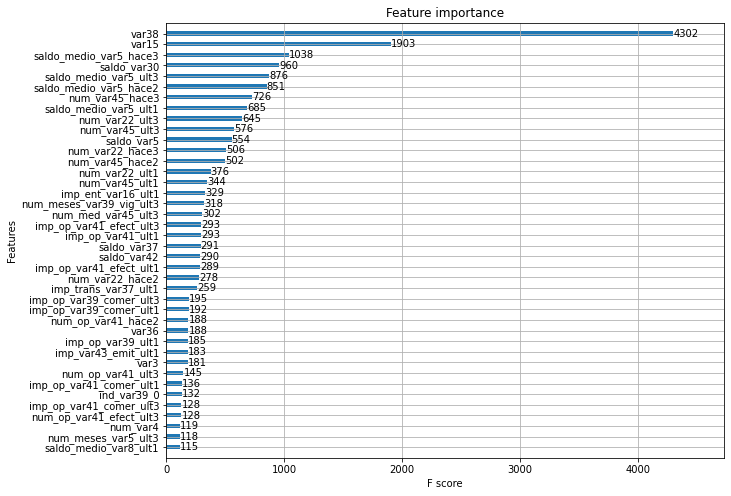

In [56]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

flg, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf_none, ax=ax, max_num_features=40, height=0.4)

## 1. 파이프라인 형성하기

In [59]:
!pip install feature-engine

     |████████████████████████████████| 205 kB 4.8 MB/s 
     |████████████████████████████████| 9.8 MB 59.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [60]:
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)

In [61]:
# load data again
data = pd.read_csv('/content/drive/MyDrive/iTStudy/Machine Learning/MiniProject/Santander Customer Satisfaction_train.csv')

# separate dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['ID','TARGET'], axis=1),
    data['TARGET'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((53214, 369), (22806, 369))

In [65]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.995)), # drops constand and quasi-constant altogether
    ('duplicated', DropDuplicateFeatures()), # drops duplicates
    ('correlation', SmartCorrelatedSelection( # drops correlated
        threshold=0.7,
        selection_method="model_performance",
        estimator=XGBClassifier(n_estimators=10, random_state=42, learning_rate=0.02, max_depth=7,
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03, subsample=0.8, n_jobs=-1),
    )),
])
# find features to remove

pipe.fit(X_train, y_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.995)),
                ('duplicated', DropDuplicateFeatures()),
                ('correlation',
                 SmartCorrelatedSelection(estimator=XGBClassifier(colsample_bytree=0.75,
                                                                  learning_rate=0.02,
                                                                  max_depth=7,
                                                                  n_estimators=10,
                                                                  n_jobs=-1,
                                                                  random_state=42,
                                                                  reg_alpha=0.03,
                                                                  subsample=0.8),
                                          selection_method='model_performance',
                                          threshold=0.7))])

In [66]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)
X_train.shape, X_test.shape

((53214, 48), (22806, 48))

In [67]:
xgb_clf_none_imp = XGBClassifier(n_estimators=500, random_state=42, learning_rate=0.02, max_depth=7,
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03, subsample=0.8, n_jobs=-1) # 500으로 했을때 353이 제일 잘나왔음.

xgb_clf_none_imp.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
            eval_set=[(X_train, y_train), (X_test, y_test)])


[0]	validation_0-auc:0.823066	validation_1-auc:0.808567
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.817148	validation_1-auc:0.799068
[2]	validation_0-auc:0.829333	validation_1-auc:0.811781
[3]	validation_0-auc:0.831973	validation_1-auc:0.813156
[4]	validation_0-auc:0.838156	validation_1-auc:0.821607
[5]	validation_0-auc:0.841818	validation_1-auc:0.824065
[6]	validation_0-auc:0.840338	validation_1-auc:0.825221
[7]	validation_0-auc:0.842279	validation_1-auc:0.827336
[8]	validation_0-auc:0.843596	validation_1-auc:0.827208
[9]	validation_0-auc:0.844817	validation_1-auc:0.828207
[10]	validation_0-auc:0.845669	validation_1-auc:0.828595
[11]	validation_0-auc:0.84599	validation_1-auc:0.828438
[12]	validation_0-auc:0.844587	validation_1-auc:0.827313
[13]	validation_0-auc:0.845388	validation_1-auc:0.828256
[14]	validation_0-auc:0.844207	validation_1-auc:0.82539

XGBClassifier(colsample_bytree=0.75, learning_rate=0.02, max_depth=7,
              n_estimators=500, n_jobs=-1, random_state=42, reg_alpha=0.03,
              subsample=0.8)

In [68]:
pred_xgb_none = xgb_clf_none_imp.predict(X_test)
pred_proba_xgb_none = xgb_clf_none_imp.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred_xgb_none, pred_proba_xgb_none)

오차행렬
[[21891     1]
 [  912     2]]
정확도: 0.9600, 정밀도: 0.6667, 재현율: 0.0022        F1: 0.0044, AUC: 0.8373


## 1) Shuffling으로 특성 고르기 

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['ID','TARGET'], axis=1),
    data['TARGET'],
    test_size=0.2,
    random_state=42)


pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.996)), # drops constand and quasi-constant altogether
    ('duplicated', DropDuplicateFeatures()),
])

# find features to remove
pipe.fit(X_train, y_train)

# remove variables

X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [70]:
shuffle = SelectByShuffling(
    estimator = RandomForestClassifier(n_estimators=10, max_depth=2,
                                       random_state=42, n_jobs=-1), # the model
    scoring="roc_auc", # the metric to determine model performance
    cv=3, # the cross-validation fold
)

shuffle.fit(X_train, y_train)

SelectByShuffling(estimator=RandomForestClassifier(max_depth=2, n_estimators=10,
                                                   n_jobs=-1, random_state=42))

In [71]:
X_train = shuffle.transform(X_train)
X_test = shuffle.transform(X_test)

print('Number of variables after removing non important: ', X_train.shape[1])

Number of variables after removing non important:  13


In [72]:
xgb_clf_none_imp = XGBClassifier(n_estimators=500, random_state=42, learning_rate=0.02, max_depth=7,
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03, subsample=0.8, n_jobs=-1) # 500으로 했을때 353이 제일 잘나왔음.

xgb_clf_none_imp.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
            eval_set=[(X_train, y_train), (X_test, y_test)])


[0]	validation_0-auc:0.817328	validation_1-auc:0.809004
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.819895	validation_1-auc:0.808794
[2]	validation_0-auc:0.826354	validation_1-auc:0.813044
[3]	validation_0-auc:0.825864	validation_1-auc:0.811388
[4]	validation_0-auc:0.831439	validation_1-auc:0.812405
[5]	validation_0-auc:0.834021	validation_1-auc:0.81409
[6]	validation_0-auc:0.832296	validation_1-auc:0.811465
[7]	validation_0-auc:0.829464	validation_1-auc:0.805971
[8]	validation_0-auc:0.828982	validation_1-auc:0.806642
[9]	validation_0-auc:0.831181	validation_1-auc:0.809393
[10]	validation_0-auc:0.832624	validation_1-auc:0.810346
[11]	validation_0-auc:0.833647	validation_1-auc:0.810806
[12]	validation_0-auc:0.835104	validation_1-auc:0.81217
[13]	validation_0-auc:0.836328	validation_1-auc:0.813248
[14]	validation_0-auc:0.837008	validation_1-auc:0.812344

XGBClassifier(colsample_bytree=0.75, learning_rate=0.02, max_depth=7,
              n_estimators=500, n_jobs=-1, random_state=42, reg_alpha=0.03,
              subsample=0.8)

In [73]:
pred_xgb_none = xgb_clf_none_imp.predict(X_test)
pred_proba_xgb_none = xgb_clf_none_imp.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred_xgb_none, pred_proba_xgb_none)

오차행렬
[[14597     0]
 [  607     0]]
정확도: 0.9601, 정밀도: 0.0000, 재현율: 0.0000        F1: 0.0000, AUC: 0.8308


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 컬럼 제거 2 

## 기능 전처리

In [223]:
train_df = SC_train.copy()
test_df = SC_test.copy()
y_train = train_df['TARGET']
train_df.drop(['ID','TARGET'],axis=1,inplace=True)
test_df.drop(['ID'],axis=1,inplace=True)

### 불변 특성 제거

In [224]:
def remove_const_feature(train=train_df,  test=test_df, threshold=0):
    from sklearn.feature_selection import VarianceThreshold

    vt = VarianceThreshold(threshold=threshold)
    vt.fit(train_df)
    const_feat = [x for x in train_df.columns if (x !='TARGET') and (x not in train_df.columns[vt.get_support()])]

    print("Number of columns before: {} ".format(train_df.shape[1]))
    train_df.drop(const_feat, axis=1, inplace=True)
    test_df.drop(const_feat, axis=1, inplace=True)

    print("{} features with 0 variance have been removed".format(len(const_feat)))
    print("Number of columns in train dataset after: {}".format(train_df.shape[1]))
    print("Number of columns in test dataset after: {}".format(test_df.shape[1]))

### 준상수 특징 제거

In [225]:
def remove_quasso_const_feat(train=train_df, test=test_df, threshold=0.0004):
    from sklearn.feature_selection import VarianceThreshold

    vt = VarianceThreshold(threshold=threshold)
    vt.fit(train_df)
    quasi_const_feat = [x for x in train_df.columns if (x !='TARGET') and (x not in train_df.columns[vt.get_support()])]
    print("Number of columns before: {} ".format(train_df.shape[1]))
    train_df.drop(quasi_const_feat, axis=1, inplace=True)
    test_df.drop(quasi_const_feat, axis=1, inplace=True)
    print("{} features with very little variance have been removed".format(len(quasi_const_feat)))
    print("Number of columns in train dataset after: {}".format(train_df.shape[1]))
    print("Number of columns in test dataset after: {}".format(test_df.shape[1]))

### 상관관계가 높은 기능 제거

In [226]:
def del_correlated_feats(train=train_df, test=test_df, threshold=0.975):

    correlated_columns=[]
    correlations=train_df.corr()
    for i in range(len(train_df.columns)):
        for j in range(i):
            if (correlations.iloc[i,j]>= threshold) and (correlations.columns[j] not in correlated_columns):
                correlated_columns.append(correlations.columns[i])
    
    print("Number of columns before: {}".format(train_df.shape[1]))
    print("Number of columns before: {}".format(test_df.shape[1]))

    print("Number of correlated features being removed: {}".format(len(correlated_columns)))
    
    train_df.drop(set(correlated_columns), axis=1, inplace=True)
    test_df.drop(set(correlated_columns), axis=1, inplace=True)
    print("Number of columns in train dataset after: {}".format(train_df.shape[1]))
    print("Number of columns in test dataset after: {}".format(test_df.shape[1]))

### 희소 특징 제거

In [227]:
def remove_sparse_feats(train=train_df, test=test_df, threshold=0.996):
    zeros=(train_df==0).astype(int).sum()
    not_zeros=(train_df != 0).astype(int).sum()

    sparse_columns=[]

    for i in range(len(train_df.columns)):
        if (zeros[i]/(zeros[i]+not_zeros[i])) > threshold:
            sparse_columns.append(train_df.columns[i])

    print("Number of columns before: {}".format(train_df.shape[1]))
    print("Number of columns before: {}".format(test_df.shape[1]))

    train_df.drop(sparse_columns, axis=1, inplace=True)
    test_df.drop(sparse_columns, axis=1, inplace=True)

    print("Number of columns in train dataset after: {}".format(train_df.shape[1]))
    print("Number of columns in test dataset after: {}".format(test_df.shape[1]))

In [228]:
remove_const_feature(train_df, test_df)

Number of columns before: 369 
34 features with 0 variance have been removed
Number of columns in train dataset after: 335
Number of columns in test dataset after: 335


In [229]:
remove_quasso_const_feat(train_df, test_df)

Number of columns before: 335 
25 features with very little variance have been removed
Number of columns in train dataset after: 310
Number of columns in test dataset after: 310


In [230]:
del_correlated_feats(train_df, test_df)

Number of columns before: 310
Number of columns before: 310
Number of correlated features being removed: 88
Number of columns in train dataset after: 222
Number of columns in test dataset after: 222


In [231]:
remove_sparse_feats(train_df, test_df)

Number of columns before: 222
Number of columns before: 222
Number of columns in train dataset after: 122
Number of columns in test dataset after: 122


In [232]:
train_df.shape, test_df.shape, y_train.shape

((76020, 122), (75818, 122), (76020,))

## Feature Engineering

- no_zeros 각 행에 0의 갯수를 모두 더해서 새로운 컬럼을 만들어준다.
- no_nonzeros 각 행에 0이 아닌 갯수를 모두 더해 새로운 컬럼을 생성

In [233]:
def add_feature_no_zeros(train=train_df,test=test_df):
    """
    Add feature which tells the no. of occurences of zeros,nonzeros across a datapoint
    """
    col = [k for k in train.columns if k!='TARGET']
    for df in [train,test]:
        df['no_zeros'] = (df.loc[:,col]==0).sum(axis=1).values
        df['no_nonzeros'] = (df.loc[:,col]!=0).sum(axis=1).values

In [234]:
add_feature_no_zeros(train_df, test_df)

In [262]:
train_df.no_zeros

0        109
1         92
2         97
3         72
4         80
        ... 
76015    109
76016     86
76017     98
76018     97
76019    109
Name: no_zeros, Length: 76020, dtype: int64

#### 23세 미만인지 아닌지

In [236]:
train_df.loc[(train_df['var15'] < 23), 'below_23'] = 1
train_df.loc[(train_df['var15'] >= 23), 'below_23'] = 0
test_df.loc[(test_df['var15'] < 23), 'below_23'] = 1
test_df.loc[(test_df['var15'] >= 23), 'below_23'] = 0

In [237]:
train_df.shape, test_df.shape, 

((76020, 125), (75818, 125))

#### 80세 이상인지

In [238]:
train_df.loc[(train_df['var15'] < 80), 'above_80'] = 0
train_df.loc[(train_df['var15'] >= 80), 'above_80'] = 1
test_df.loc[(test_df['var15'] < 80), 'above_80'] = 0
test_df.loc[(test_df['var15'] >= 80), 'above_80'] = 1

### var38 == 117310.979016494

In [239]:
train_df.loc[(train_df['var38'] == 117310.979016494), 'value_var38'] = 1
train_df.loc[(train_df['var15'] != 117310.979016494), 'value_var38'] = 0
test_df.loc[(test_df['var15'] == 117310.979016494), 'value_var38'] = 1
test_df.loc[(test_df['var15'] != 117310.979016494), 'value_var38'] = 0

## 데이터 불리 X

In [240]:
pd.concat((SC_train['ID'],train_df,SC_train['TARGET']),axis=1).to_csv('train_df_cjh.csv') 
pd.concat((SC_test['ID'],test_df),axis=1).to_csv('test_df_cjh.csv') # 0.82265

#### XGBC

In [264]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc


xgb_clf = XGBClassifier(n_estimators=353, random_state=42,learning_rate=0.02, max_depth=7,
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03, subsample=0.8, n_jobs=-1) # 500으로 했을때 353이 제일 잘나왔음.

xgb_clf.fit(train_df, y_train)

XGBClassifier(colsample_bytree=0.75, learning_rate=0.02, max_depth=7,
              n_estimators=353, n_jobs=-1, random_state=42, reg_alpha=0.03,
              subsample=0.8)

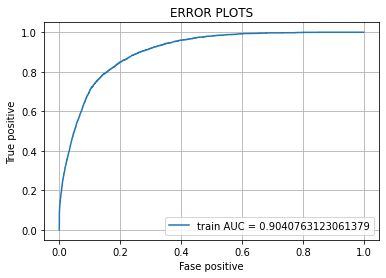

In [265]:
pred_xgb = xgb_clf.predict(train_df)
y_train_pred = xgb_clf.predict_proba(train_df)[:,1]
X_test_pred = xgb_clf.predict_proba(train_df)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)

plt.plot(train_fpr, train_tpr, label='train AUC = ' + str(auc(train_fpr, train_tpr)))

plt.legend()
plt.xlabel('Fase positive')
plt.ylabel('True positive')
plt.title('ERROR PLOTS')
plt.grid(True)
plt.show()

In [266]:
get_clf_eval(y_train, pred_xgb, X_test_pred)

오차행렬
[[73012     0]
 [ 2897   111]]
정확도: 0.9619, 정밀도: 1.0000, 재현율: 0.0369        F1: 0.0712, AUC: 0.9041


#### 앙상블

In [267]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [268]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=150, max_depth=13, min_samples_split=5, min_samples_leaf=2, random_state=42)
xgb_clf = XGBClassifier(n_estimators=353, random_state=42,learning_rate=0.02, max_depth=7,
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03, subsample=0.8, n_jobs=-1) # 500으로 했을때 353이 제일 잘나왔음.


In [269]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('xgb', xgb_clf)],  # estimators=[('이름', 분류기1), ('이름', 분류기2), ...]
    voting='soft'
)

In [270]:
voting_clf.fit(train_df, y_train)
pred_vot = voting_clf.predict(train_df)
y_train_pred = voting_clf.predict_proba(train_df)[:,1]
get_clf_eval(y_train, pred_vot, y_train_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


오차행렬
[[73012     0]
 [ 2953    55]]
정확도: 0.9612, 정밀도: 1.0000, 재현율: 0.0183        F1: 0.0359, AUC: 0.8723


## 데이터 분리

In [272]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y_train, random_state=42, test_size=0.2)

### 모델

#### XGBC

In [273]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc


xgb_clf = XGBClassifier(n_estimators=353, random_state=42,learning_rate=0.02, max_depth=7,
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03, subsample=0.8, n_jobs=-1) # 500으로 했을때 353이 제일 잘나왔음.

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
            eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-auc:0.826836	validation_1-auc:0.808854
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.820636	validation_1-auc:0.793189
[2]	validation_0-auc:0.828967	validation_1-auc:0.804187
[3]	validation_0-auc:0.833491	validation_1-auc:0.809694
[4]	validation_0-auc:0.835662	validation_1-auc:0.811401
[5]	validation_0-auc:0.837759	validation_1-auc:0.814374
[6]	validation_0-auc:0.83834	validation_1-auc:0.814208
[7]	validation_0-auc:0.840746	validation_1-auc:0.818822
[8]	validation_0-auc:0.839084	validation_1-auc:0.813709
[9]	validation_0-auc:0.842092	validation_1-auc:0.815934
[10]	validation_0-auc:0.843873	validation_1-auc:0.818751
[11]	validation_0-auc:0.843435	validation_1-auc:0.817814
[12]	validation_0-auc:0.84311	validation_1-auc:0.81798
[13]	validation_0-auc:0.844354	validation_1-auc:0.819354
[14]	validation_0-auc:0.844121	validation_1-auc:0.819034


XGBClassifier(colsample_bytree=0.75, learning_rate=0.02, max_depth=7,
              n_estimators=353, n_jobs=-1, random_state=42, reg_alpha=0.03,
              subsample=0.8)

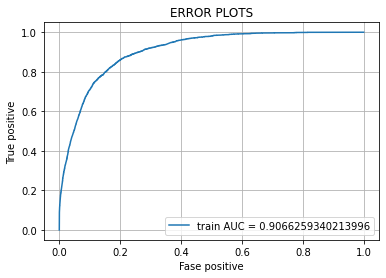

In [274]:
pred_xgb = xgb_clf.predict(X_test)
y_train_pred = xgb_clf.predict_proba(X_train)[:,1]
X_test_pred = xgb_clf.predict_proba(X_test)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)

plt.plot(train_fpr, train_tpr, label='train AUC = ' + str(auc(train_fpr, train_tpr)))

plt.legend()
plt.xlabel('Fase positive')
plt.ylabel('True positive')
plt.title('ERROR PLOTS')
plt.grid(True)
plt.show()

In [275]:
get_clf_eval(y_test, pred_xgb, X_test_pred)

오차행렬
[[14595     2]
 [  607     0]]
정확도: 0.9599, 정밀도: 0.0000, 재현율: 0.0000        F1: 0.0000, AUC: 0.8424


### LGBM

In [276]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=117, random_state=42, learning_rate=0.03, reg_alpha=0.03, 
                              min_child_weight=1, colsample_bytree=0.5, max_depth=128,min_child_samples=100, subsample=0.8)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
                 eval_set=[(X_train, y_train), (X_test, y_test)])
lgbm_roc_score = roc_auc_score(y_test, lgbm_wrapper.predict_proba(X_test)[:, 1], average='macro')
print(f'ROC AUC: {lgbm_roc_score:.4f}')


[1]	training's auc: 0.821418	training's binary_logloss: 0.163857	valid_1's auc: 0.809745	valid_1's binary_logloss: 0.165589
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.81936	training's binary_logloss: 0.162666	valid_1's auc: 0.796414	valid_1's binary_logloss: 0.164583
[3]	training's auc: 0.82232	training's binary_logloss: 0.16134	valid_1's auc: 0.792383	valid_1's binary_logloss: 0.163577
[4]	training's auc: 0.819083	training's binary_logloss: 0.160352	valid_1's auc: 0.790484	valid_1's binary_logloss: 0.162732
[5]	training's auc: 0.819549	training's binary_logloss: 0.159252	valid_1's auc: 0.791182	valid_1's binary_logloss: 0.161847
[6]	training's auc: 0.829111	training's binary_logloss: 0.157516	valid_1's auc: 0.802888	valid_1's binary_logloss: 0.160292
[7]	training's auc: 0.828719	training's binary_logloss: 0.156642	valid_1's auc: 0.801273	valid_1's binary_logloss: 0.159566
[8]	training's auc: 0.832994	training's binary_logloss: 0.155093	valid_1